# Lab 1 Analysis Example using Thicket

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [2]:
tk = th.Thicket.from_caliperreader(glob("cali_files/sort0/*.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time"], axis=1)
#tk.dataframe = tk.dataframe.drop(["spot.channel", "Total time"], axis=1)

In [3]:
# Performance data
tk.dataframe

Min time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              27870472         9.851475   
                                                  47336685         0.771172   
                                                  47349995        33.607990   
                                                  48844705        35.151441   
                                                  112973988        2.486051   
                                                  133440747       25.665017   
                                                  147533088       33.615235   
                                                  153181124        1.471097   
                                                  162177994        1.651498   
                                                  199746946        0.886345   
                                                  246214965       17.359519   
                                                  264455869        3.868689   
                                                  331780099       10.316530   
                                                  340786940        0.814511   
                                                  341218275       18.503863   
                                                  342176260        2.564809   
                                                  352749751        2.503674   
                                                  353694380       37.521588   
                                                  361584300        5.590988   
                                                  409130334        0.607422   
                                                  455670205        0.607166   
                                                  478380754        2.430481   
                                                  500480455        5.258444   
                                                  520770882        0.155172   
                                                  521436951        0.495869   
                                                  528520268        0.070389   
                                                  543825812        1.440629   
                                                  544925369        0.893507   
                                                  548212958        1.928146   
                                                  610086156        1.828237   
                                                  610176732        0.554140   
                                                  630029934      244.708830   
                                                  653311157        0.013567   
                                                  681821339        0.802393   
                                                  707336834        0.076999   
                                                  711667792        1.865128   
                                                  824490133        2.643489   
                                                  862429449        0.365657   
                                                  881410611        0.055659   
                                                  891846577        0.056925   
                                                  916639650        1.107286   
                                                  916864386        2.769755   
                                                  942006610       16.866352   
                                                  957597401        3.586996   
                                                  964496916        3.576238   
                                                  966775440        0.508345   
                                                  1015993060      18.311694   
                                                  1026471878     228.085844   
                                                  1071965932       7.009381   
                                 

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [4]:
tk.statsframe.dataframe["time"]= 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 comm_large
│  │  ├─ 1.000 MPI_Recv
│  │  ├─ 1.000 MPI_Scatter
│  │  └─ 1.000 MPI_Send
│  └─ 1.000 comm_small
│     ├─ 1.000 MPI_Bcast
│     ├─ 1.000 MPI_Gather
│     ├─ 1.000 MPI_Recv
│     └─ 1.000 MPI_Send
├─ 1.000 comp
│  ├─ 1.000 comp_large
│  └─ 1.000 comp_small
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [5]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
27870472             2.11.0-dev             512   
47336685             2.11.0-dev              16   
47349995             2.11.0-dev              32   
48844705             2.11.0-dev             512   
112973988            2.11.0-dev             128   
133440747            2.11.0-dev            1024   
147533088            2.11.0-dev             512   
153181124            2.11.0-dev              32   
162177994            2.11.0-dev             128   
199746946            2.11.0-dev               8   
246214965            2.11.0-dev             512   
264455869            2.11.0-dev              64   
331780099            2.11.0-dev             512   
340786940            2.11.0-dev              16   
341218275            2.11.0-dev             256   
342176260            2.11.0-dev              32   
352749751            2.11.0-dev              64   
353694380            2.11.0-dev             512   
361584300            2.11.0-dev             128   
409130334            2.11.0-dev               2   
455670205            2.11.0-dev              64   
478380754            2.11.0-dev              32   
500480455            2.11.0-dev             256   
520770882            2.11.0-dev              64   
521436951            2.11.0-dev              64   
528520268            2.11.0-dev              64   
543825812            2.11.0-dev              64   
544925369            2.11.0-dev               2   
548212958            2.11.0-dev              32   
610086156            2.11.0-dev             128   
610176732            2.11.0-dev             256   
630029934            2.11.0-dev            1024   
653311157            2.11.0-dev              16   
681821339            2.11.0-dev             512   
707336834            2.11.0-dev               8   
711667792            2.11.0-dev            1024   
824490133            2.11.0-dev             128   
862429449            2.11.0-dev               4   
881410611            2.11.0-dev               2   
891846577            2.11.0-dev               2   
916639650            2.11.0-dev               4   
916864386            2.11.0-dev             128   
942006610            2.11.0-dev              64   
957597401            2.11.0-dev              32   
964496916            2.11.0-dev               4   
966775440            2.11.0-dev               2   
1015993060           2.11.0-dev             512   
1026471878           2.11.0-dev            1024   
1071965932           2.11.0-dev               2   
1111433056           2.11.0-dev              64   
1115206163           2.11.0-dev             256   
1118429824           2.11.0-dev              64   
1138755284           2.11.0-dev              16   
1157827669           2.11.0-dev             512   
1160808634           2.11.0-dev            1024   
1171743201           2.11.0-dev               8   
1218193598           2.11.0-dev               2   
1220253797           2.11.0-dev               8   
1251537983           2.11.0-dev            1024   
1251577957           2.11.0-dev              64   
1272774332           2.11.0-dev               8   
1276743869           2.11.0-dev            1024   
1283284315           2.11.0-dev             128   
1327162941           2.11.0-dev            1024   
1341929903           2.11.0-dev            1024   
1349941363           2.11.0-dev             256   
1359835518           2.11.0-dev            1024   
1371405132           2.11.0-dev               2   
1390697016           2.11.0-dev               4   
1399701899           2.11.0-dev               4   
1411572590           2.11.0-dev              32   
1430042716           2.11.0-dev            1024   
1470328038           2.11.0-dev              64   
1479733613           2.11.0-dev               4   
1494702664           2.11.0-dev             512   
1495703692           2.11.0-dev               8   
1502164658           2.11.0-dev  

In [6]:
gb = tk.groupby("num_procs")
print(gb.keys())
allthickets = list(gb.values())
input2 = gb[2].groupby("Algorithm")
input4 = gb[4].groupby("Algorithm")
input8 = gb[8].groupby("Algorithm")
input16 = gb[16].groupby("Algorithm")
input32 = gb[32].groupby("Algorithm")
input64 = gb[64].groupby("Algorithm")
input128 = gb[128].groupby("Algorithm")
input256 = gb[256].groupby("Algorithm")
input512 = gb[512].groupby("Algorithm")
input1024 = gb[1024].groupby("Algorithm")


10  thickets created...
{2: <thicket.thicket.Thicket object at 0x2b426b15f160>, 4: <thicket.thicket.Thicket object at 0x2b426b2d5520>, 8: <thicket.thicket.Thicket object at 0x2b426b22fca0>, 16: <thicket.thicket.Thicket object at 0x2b426b31ed00>, 32: <thicket.thicket.Thicket object at 0x2b426b2d84f0>, 64: <thicket.thicket.Thicket object at 0x2b426b203220>, 128: <thicket.thicket.Thicket object at 0x2b426b2bfe50>, 256: <thicket.thicket.Thicket object at 0x2b426b1b33d0>, 512: <thicket.thicket.Thicket object at 0x2b426b25c550>, 1024: <thicket.thicket.Thicket object at 0x2b426b3194f0>}
dict_keys([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])
3  thickets created...
{'Bubble Sort(Odd/Even)': <thicket.thicket.Thicket object at 0x2b426b20cc10>, 'MergeSort': <thicket.thicket.Thicket object at 0x2b426b598850>, 'Sample Sort': <thicket.thicket.Thicket object at 0x2b426b20c910>}
3  thickets created...
{'Bubble Sort(Odd/Even)': <thicket.thicket.Thicket object at 0x2b426b5fce20>, 'MergeSort': <thicket.thi

Compose these 3 groups column-wise to get a holistic view of the data

In [7]:
ctk2 = th.Thicket.concat_thickets(
    thickets=list(input2.values()),
    headers=list(input2.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk4 = th.Thicket.concat_thickets(
    thickets=list(input4.values()),
    headers=list(input4.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk8 = th.Thicket.concat_thickets(
    thickets=list(input8.values()),
    headers=list(input8.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk16 = th.Thicket.concat_thickets(
    thickets=list(input16.values()),
    headers=list(input16.keys()),
    axis="columns",
    metadata_key="InputSize"
)
ctk32 = th.Thicket.concat_thickets(
    thickets=list(input32.values()),
    headers=list(input32.keys()),
    axis="columns",
    metadata_key="InputSize"
)
ctk64 = th.Thicket.concat_thickets(
    thickets=list(input64.values()),
    headers=list(input64.keys()),
    axis="columns",
    metadata_key="InputSize"
)
ctk128 = th.Thicket.concat_thickets(
    thickets=list(input128.values()),
    headers=list(input128.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk256 = th.Thicket.concat_thickets(
    thickets=list(input256.values()),
    headers=list(input256.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk512 = th.Thicket.concat_thickets(
    thickets=list(input512.values()),
    headers=list(input512.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk1024 = th.Thicket.concat_thickets(
    thickets=list(input1024.values()),
    headers=list(input1024.keys()),
    axis="columns",
    metadata_key="InputSize"
)



allctk = []
allctk.append(ctk2)
allctk.append(ctk4)
allctk.append(ctk8)
allctk.append(ctk16)
allctk.append(ctk32)
allctk.append(ctk64)
allctk.append(ctk128)
allctk.append(ctk256)
allctk.append(ctk512)
allctk.append(ctk1024)

In [8]:
for ctk in allctk:
    display(ctk.dataframe)

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  0.001669   
                                                  262144                 0.004282   
                                                  1048576                0.015861   
                                                  4194304                0.056925   
                                                  16777216               0.224419   
                                                  67108864               0.893507   
                                                  268435456              3.588849   
{'name': 'comm', 'type': 'function'}              65536                  0.000697   
                                                  262144                 0.000765   
                                                  1048576                0.002764   
                                                  4194304                0.006602   
                                                  16777216               0.023035   
                                                  67108864               0.090032   
                                                  268435456              0.370215   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  0.000681   
                                                  262144                 0.000749   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  0.009862   
                                                  262144                 0.011924   
                                                  1048576                0.025625   
                                                  4194304                0.080182   
                                                  16777216               0.298790   
                                                  67108864               1.141405   
                                                  268435456              4.551473   
{'name': 'comm', 'type': 'function'}              65536                  0.008726   
                                                  262144                 0.008998   
                                                  1048576                0.012933   
                                                  4194304                0.025192   
                                                  16777216               0.078119   
                                                  67108864               0.257947   
                                                  268435456              1.048927   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  0.008695   
                                                  262144                 0.008958   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  0.070013   
                                                  262144                 0.078054   
                                                  1048576                0.083165   
                                                  4194304                0.076999   
                                                  16777216               0.595360   
                                                  67108864               2.256454   
                                                  268435456              8.694964   
{'name': 'comm', 'type': 'function'}              65536                  0.049288   
                                                  262144                 0.055834   
                                                  1048576                0.071711   
                                                  4194304                0.030807   
                                                  16777216               0.202731   
                                                  67108864               0.772668   
                                                  268435456              2.873536   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  0.049227   
                                                  262144                 0.055774   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  0.013567   
                                                  262144                 0.044404   
                                                  1048576                0.028230   
                                                  4194304                0.069699   
                                                  16777216               1.294479   
                                                  67108864               4.403630   
                                                  268435456             17.140277   
{'name': 'comm', 'type': 'function'}              65536                  0.012083   
                                                  262144                 0.041194   
                                                  1048576                0.017649   
                                                  4194304                0.039620   
                                                  16777216               0.575165   
                                                  67108864               1.719551   
                                                  268435456              6.684301   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  0.011905   
                                                  262144                 0.041073   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  0.017316   
                                                  262144                 0.024514   
                                                  1048576                0.292084   
                                                  4194304                0.072596   
                                                  16777216               2.564809   
                                                  67108864               9.126755   
                                                  268435456             33.607990   
{'name': 'comm', 'type': 'function'}              65536                  0.015669   
                                                  262144                 0.020775   
                                                  1048576                0.262416   
                                                  4194304                0.033240   
                                                  16777216               1.168811   
                                                  67108864               3.911038   
                                                  268435456             13.565610   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  0.015308   
                                                  262144                 0.020410   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  0.607166   
                                                  262144                 0.570346   
                                                  1048576                1.144371   
                                                  4194304                0.070389   
                                                  16777216               3.868689   
                                                  67108864              15.518905   
                                                  268435456             65.925327   
{'name': 'comm', 'type': 'function'}              65536                  0.590661   
                                                  262144                 0.550683   
                                                  1048576                1.069521   
                                                  4194304                0.031456   
                                                  16777216               2.001097   
                                                  67108864               6.704726   
                                                  268435456             27.669022   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  0.589963   
                                                  262144                 0.549964   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  2.321344   
                                                  262144                 1.997997   
                                                  1048576                2.578823   
                                                  4194304                1.255984   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  167772216                   NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  2.279356   
                                                  262144                 1.953333   
                                                  1048576                2.525473   
                                                  4194304                0.991721   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  167772216                   NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  167772216                   NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  167772216                   NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  167772216                   NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216       

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  5.164360   
                                                  262144                 5.258444   
                                                  1048576                0.554140   
                                                  4194304                4.638044   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  5.122629   
                                                  262144                 5.230117   
                                                  1048576                0.534270   
                                                  4194304                4.506608   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  5.119641   
                                                  262144                 5.207945   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  0.679221   
                                                  262144                 0.802393   
                                                  1048576                0.899907   
                                                  4194304               10.316530   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  0.660691   
                                                  262144                 0.783347   
                                                  1048576                0.873498   
                                                  4194304               10.019768   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  0.653452   
                                                  262144                 0.777582   
                                                  1048576        

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              InputSize                         
{'name': 'main', 'type': 'function'}              65536                  2.625594   
                                                  262144                 2.703449   
                                                  1048576                2.948187   
                                                  4194304                1.865128   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm', 'type': 'function'}              65536                  2.582861   
                                                  262144                 2.659602   
                                                  1048576                2.893985   
                                                  4194304                1.782231   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_large', 'type': 'function'}        65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Recv', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'MPI_Send', 'type': 'function'}          65536                       NaN   
                                                  262144                      NaN   
                                                  1048576                     NaN   
                                                  4194304                     NaN   
                                                  16777216                    NaN   
                                                  67108864                    NaN   
                                                  268435456                   NaN   
{'name': 'comm_small', 'type': 'function'}        65536                  2.570963   
                                                  262144                 2.642499   
                                                  1048576        

Perform pandas operations to get the table in a desirable format for plotting

In [9]:
for ctk in allctk:
    # Drop unwanted columns
    columns_to_drop = [("node", ""), ("index", ""),]
    ctk.dataframe = ctk.dataframe.reset_index().drop(columns_to_drop, axis=1, errors='ignore')
    # Rename index to remove tuple
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])

In [10]:
for ctk in allctk:
    display(ctk.dataframe)

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  0.001669      0.001697      0.001683   
                  262144                 0.004282      0.004287      0.004285   
                  1048576                0.015861      0.015900      0.015881   
                  4194304                0.056925      0.056953      0.056939   
                  16777216               0.224419      0.224724      0.224572   
                  67108864               0.893507      0.893918      0.893712   
                  268435456              3.588849      3.589807      3.589328   
comm              65536                  0.000697      0.000995      0.000846   
                  262144                 0.000765      0.001959      0.001362   
                  1048576                0.002764      0.006918      0.004841   
                  4194304                0.006602      0.024389      0.015495   
                  16777216               0.023035      0.096847      0.059941   
                  67108864               0.090032      0.383651      0.236842   
                  268435456              0.370215      1.558571      0.964393   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  0.000681      0.000986      0.000833   
                  262144                 0.000749      0.001949      0.001349   
                  1048576                0.002746      0.006908      0.004827   
                  4194304                0.006583      0.024378      0.015481   
                  16777216               0.023013      0.09

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  0.009862      0.012919      0.010884   
                  262144                 0.011924      0.012679      0.012261   
                  1048576                0.025625      0.029243      0.026919   
                  4194304                0.080182      0.083537      0.082690   
                  16777216               0.298790      0.303664      0.300991   
                  67108864               1.141405      1.144665      1.143831   
                  268435456              4.551473      4.561324      4.558743   
comm              65536                  0.008726      0.011703      0.009795   
                  262144                 0.008998      0.009415      0.009198   
                  1048576                0.012933      0.020015      0.015438   
                  4194304                0.025192      0.047865      0.037989   
                  16777216               0.078119      0.160804      0.122705   
                  67108864               0.257947      0.575367      0.432585   
                  268435456              1.048927      2.261688      1.717952   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  0.008695      0.011654      0.009759   
                  262144                 0.008958      0.009367      0.009161   
                  1048576                0.012901      0.019999      0.015400   
                  4194304                0.025159      0.047847      0.037951   
                  16777216               0.078082      0.16

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  0.070013      0.105886      0.095929   
                  262144                 0.078054      0.117313      0.096778   
                  1048576                0.083165      0.128417      0.109066   
                  4194304                0.076999      0.084011      0.081604   
                  16777216               0.595360      0.651737      0.619231   
                  67108864               2.256454      2.286138      2.276545   
                  268435456              8.694964      8.727356      8.709558   
comm              65536                  0.049288      0.100902      0.082573   
                  262144                 0.055834      0.103844      0.078810   
                  1048576                0.071711      0.104827      0.087098   
                  4194304                0.030807      0.056484      0.041469   
                  16777216               0.202731      0.359903      0.305377   
                  67108864               0.772668      1.378597      1.009242   
                  268435456              2.873536      5.211591      3.690170   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  0.049227      0.100811      0.082491   
                  262144                 0.055774      0.103752      0.078726   
                  1048576                0.071641      0.104732      0.086998   
                  4194304                0.030737      0.056450      0.041382   
                  16777216               0.202656      0.35

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  0.013567      0.018901      0.016282   
                  262144                 0.044404      0.049128      0.046781   
                  1048576                0.028230      0.179000      0.121592   
                  4194304                0.069699      0.129821      0.096055   
                  16777216               1.294479      1.355790      1.324049   
                  67108864               4.403630      4.472347      4.431297   
                  268435456             17.140277     17.241857     17.196249   
comm              65536                  0.012083      0.017712      0.014927   
                  262144                 0.041194      0.045346      0.043714   
                  1048576                0.017649      0.168708      0.111279   
                  4194304                0.039620      0.089924      0.057090   
                  16777216               0.575165      0.938687      0.709594   
                  67108864               1.719551      2.995372      2.050051   
                  268435456              6.684301     11.329986      7.543202   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  0.011905      0.017535      0.014758   
                  262144                 0.041073      0.045164      0.043544   
                  1048576                0.017465      0.168501      0.111103   
                  4194304                0.039411      0.089737      0.056904   
                  16777216               0.575019      0.93

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  0.017316      0.028895      0.023536   
                  262144                 0.024514      0.045326      0.035496   
                  1048576                0.292084      0.358748      0.326018   
                  4194304                0.072596      0.126288      0.096084   
                  16777216               2.564809      2.668528      2.610729   
                  67108864               9.126755      9.419250      9.288184   
                  268435456             33.607990     33.805059     33.715293   
comm              65536                  0.015669      0.027264      0.021875   
                  262144                 0.020775      0.040472      0.032023   
                  1048576                0.262416      0.348324      0.305833   
                  4194304                0.033240      0.086880      0.057182   
                  16777216               1.168811      2.059903      1.538524   
                  67108864               3.911038      6.593198      4.405242   
                  268435456             13.565610     23.145458     14.680227   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  0.015308      0.026908      0.021528   
                  262144                 0.020410      0.040116      0.031673   
                  1048576                0.262174      0.347965      0.305473   
                  4194304                0.032857      0.086504      0.056820   
                  16777216               1.168523      2.05

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  0.607166      0.698265      0.652058   
                  262144                 0.570346      0.708544      0.647886   
                  1048576                1.144371      1.251195      1.190830   
                  4194304                0.070389      0.123311      0.096832   
                  16777216               3.868689      3.997776      3.919742   
                  67108864              15.518905     16.150878     15.689170   
                  268435456             65.925327     66.325380     66.214683   
comm              65536                  0.590661      0.675759      0.638959   
                  262144                 0.550683      0.703143      0.631594   
                  1048576                1.069521      1.220279      1.151474   
                  4194304                0.031456      0.097391      0.057501   
                  16777216               2.001097      3.471515      2.653428   
                  67108864               6.704726     11.019171      7.352042   
                  268435456             27.669022     46.180393     28.876876   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  0.589963      0.675001      0.638234   
                  262144                 0.549964      0.702418      0.630865   
                  1048576                1.048778      1.219520      1.150262   
                  4194304                0.030738      0.097148      0.056790   
                  16777216               2.000533      3.47

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  2.321344      2.565817      2.437002   
                  262144                 1.997997      2.265097      2.139591   
                  1048576                2.578823      2.796295      2.674346   
                  4194304                1.255984      1.339264      1.292396   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  167772216                   NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  2.279356      2.552269      2.413414   
                  262144                 1.953333      2.250122      2.114735   
                  1048576                2.525473      2.748768      2.635264   
                  4194304                0.991721      1.279680      1.236166   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  167772216                   NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  167772216                   NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  167772216                   NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  167772216                   NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  167772216                   NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  5.164360     40.106911     35.554745   
                  262144                 5.258444      5.606580      5.425991   
                  1048576                0.554140      1.020282      0.720601   
                  4194304                4.638044      5.118942      4.847202   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  5.122629     40.053201     35.518836   
                  262144                 5.230117      5.582657      5.392349   
                  1048576                0.534270      0.994116      0.698469   
                  4194304                4.506608      5.058435      4.776365   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  5.119641     40.050224     35.513320   
                  262144                 5.207945      5.579779      5.388266   
                  1048576                0.530001      0.990694      0.694861   
                  4194304                4.503540      5.055564      4.772586   
                  16777216                    NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  0.679221     34.606893     30.104560   
                  262144                 0.802393      1.328513      1.047968   
                  1048576                0.899907      1.462152      1.164611   
                  4194304               10.316530     10.831695     10.530281   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  0.660691     34.588756     30.085554   
                  262144                 0.783347      1.307744      1.026645   
                  1048576                0.873498      1.432522      1.133644   
                  4194304               10.019768     10.757523     10.451847   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  0.653452     34.583010     30.078947   
                  262144                 0.777582      1.301969      1.019664   
                  1048576                0.865017      1.424325      1.126898   
                  4194304                9.619207     10.751780     10.443770   
                  16777216                    NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              InputSize                                                     
main              65536                  2.625594      6.407683      5.278004   
                  262144                 2.703449      4.013888      3.279880   
                  1048576                2.948187      4.377997      3.747467   
                  4194304                1.865128      2.351034      2.107791   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm              65536                  2.582861      6.378198      5.237304   
                  262144                 2.659602      3.973956      3.237409   
                  1048576                2.893985      4.328706      3.693966   
                  4194304                1.782231      2.263185      2.027943   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_large        65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Recv          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Scatter       65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
MPI_Send          65536                       NaN           NaN           NaN   
                  262144                      NaN           NaN           NaN   
                  1048576                     NaN           NaN           NaN   
                  4194304                     NaN           NaN           NaN   
                  16777216                    NaN           NaN           NaN   
                  67108864                    NaN           NaN           NaN   
                  268435456                   NaN           NaN           NaN   
comm_small        65536                  2.570963      6.364417      5.222750   
                  262144                 2.642499      3.962317      3.222836   
                  1048576                2.880619      4.312468      3.678700   
                  4194304                1.766253      2.248657      2.014053   
                  16777216                    NaN          

In [11]:
# Drop unwanted columns
for ctk in allctk:
    columns_to_drop = [('Bubble Sort(Odd/Even)', 'Max time/rank'), ('Bubble Sort(Odd/Even)', 'Min time/rank'), ('Bubble Sort(Odd/Even)', 'Variance time/rank'), ('Sample Sort', 'Max time/rank'), ('Sample Sort', 'Min time/rank'), ('Sample Sort', 'Variance time/rank'), ('MergeSort', 'Variance time/rank'), ('MergeSort', 'Max time/rank'), ('MergeSort', 'Min time/rank'),]
    ctk.dataframe = ctk.dataframe.drop(columns_to_drop, axis=1, errors='ignore')
    #function_names = sorted(ctk.dataframe.columns.tolist())



In [12]:
for ctk in allctk:
    display(ctk.metadata)

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev              2   
262144               2.11.0-dev              2   
1048576              2.11.0-dev              2   
4194304              2.11.0-dev              2   
16777216             2.11.0-dev              2   
67108864             2.11.0-dev              2   
268435456            2.11.0-dev              2   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
InputSize                                                                 
65536                true      65536-2-0-bubble.cali               true   
262144               true     262144-2-0-bubble.cali               true   
1048576              true    1048576-2-0-bubble.cali               true   
4194304              true    4194304-2-0-bubble.cali               true   
16777216             true   16777216-2-0-bubble.cali               true   
67108864             true   67108864-2-0-bubble.cali               true   
268435456            true  268435456-2-0-bubble.cali               true   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1700071151  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1700071182  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1700071180  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1700079420  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1700074224  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1700074247  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1700074276  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                         \
                                 cmdlin

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev              4   
262144               2.11.0-dev              4   
1048576              2.11.0-dev              4   
4194304              2.11.0-dev              4   
16777216             2.11.0-dev              4   
67108864             2.11.0-dev              4   
268435456            2.11.0-dev              4   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
InputSize                                                                 
65536                true      65536-4-0-bubble.cali               true   
262144               true     262144-4-0-bubble.cali               true   
1048576              true    1048576-4-0-bubble.cali               true   
4194304              true    4194304-4-0-bubble.cali               true   
16777216             true   16777216-4-0-bubble.cali               true   
67108864             true   67108864-4-0-bubble.cali               true   
268435456            true  268435456-4-0-bubble.cali               true   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1700071148  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1700071182  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1700071182  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1700079420  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1700074224  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1700074245  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1700074266  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                         \
                                 cmdlin

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev              8   
262144               2.11.0-dev              8   
1048576              2.11.0-dev              8   
4194304              2.11.0-dev              8   
16777216             2.11.0-dev              8   
67108864             2.11.0-dev              8   
268435456            2.11.0-dev              8   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
InputSize                                                                 
65536                true      65536-8-0-bubble.cali               true   
262144               true     262144-8-0-bubble.cali               true   
1048576              true    1048576-8-0-bubble.cali               true   
4194304              true    4194304-8-0-bubble.cali               true   
16777216             true   16777216-8-0-bubble.cali               true   
67108864             true   67108864-8-0-bubble.cali               true   
268435456            true  268435456-8-0-bubble.cali               true   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1700071208  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1700071180  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1700071182  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1700079467  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1700074224  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1700074245  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1700074255  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                         \
                                 cmdlin

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev             16   
262144               2.11.0-dev             16   
1048576              2.11.0-dev             16   
4194304              2.11.0-dev             16   
16777216             2.11.0-dev             16   
67108864             2.11.0-dev             16   
268435456            2.11.0-dev             16   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   

                                                                          \
          spot:node.order                 spot:output spot:time.variance   
InputSize                                                                  
65536                true      65536-16-0-bubble.cali               true   
262144               true     262144-16-0-bubble.cali               true   
1048576              true    1048576-16-0-bubble.cali               true   
4194304              true    4194304-16-0-bubble.cali               true   
16777216             true   16777216-16-0-bubble.cali               true   
67108864             true   67108864-16-0-bubble.cali               true   
268435456            true  268435456-16-0-bubble.cali               true   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1700077738  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1700078300  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1700076233  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1700079426  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1700074224  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1700074245  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1700074255  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                         \
                             

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev             32   
262144               2.11.0-dev             32   
1048576              2.11.0-dev             32   
4194304              2.11.0-dev             32   
16777216             2.11.0-dev             32   
67108864             2.11.0-dev             32   
268435456            2.11.0-dev             32   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   

                                                                          \
          spot:node.order                 spot:output spot:time.variance   
InputSize                                                                  
65536                true      65536-32-0-bubble.cali               true   
262144               true     262144-32-0-bubble.cali               true   
1048576              true    1048576-32-0-bubble.cali               true   
4194304              true    4194304-32-0-bubble.cali               true   
16777216             true   16777216-32-0-bubble.cali               true   
67108864             true   67108864-32-0-bubble.cali               true   
268435456            true  268435456-32-0-bubble.cali               true   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1700077739  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1700078301  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1700076233  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1700079426  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1700074224  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1700074245  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1700074255  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                         \
                             

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev             64   
262144               2.11.0-dev             64   
1048576              2.11.0-dev             64   
4194304              2.11.0-dev             64   
16777216             2.11.0-dev             64   
67108864             2.11.0-dev             64   
268435456            2.11.0-dev             64   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   

                                                                          \
          spot:node.order                 spot:output spot:time.variance   
InputSize                                                                  
65536                true      65536-64-0-bubble.cali               true   
262144               true     262144-64-0-bubble.cali               true   
1048576              true    1048576-64-0-bubble.cali               true   
4194304              true    4194304-64-0-bubble.cali               true   
16777216             true   16777216-64-0-bubble.cali               true   
67108864             true   67108864-64-0-bubble.cali               true   
268435456            true  268435456-64-0-bubble.cali               true   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1700077738  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1700078300  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1700076233  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1700079427  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1700074224  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1700074247  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1700074268  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                         \
                             

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev          128.0   
262144               2.11.0-dev          128.0   
1048576              2.11.0-dev          128.0   
4194304              2.11.0-dev          128.0   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   
167772216                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   
167772216                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                                           2.0   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   
167772216                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   
167772216                       NaN            NaN          NaN   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
InputSize                                                                 
65536                true    65536-128-0-bubble.cali               true   
262144               true   262144-128-0-bubble.cali               true   
1048576              true  1048576-128-0-bubble.cali               true   
4194304              true  4194304-128-0-bubble.cali               true   
16777216              NaN                        NaN                NaN   
67108864              NaN                        NaN                NaN   
268435456             NaN                        NaN                NaN   
167772216             NaN                        NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700076e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1.700079e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216        

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev          256.0   
262144               2.11.0-dev          256.0   
1048576              2.11.0-dev          256.0   
4194304              2.11.0-dev          256.0   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                                           2.0   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
InputSize                                                                 
65536                true    65536-256-0-bubble.cali               true   
262144               true   262144-256-0-bubble.cali               true   
1048576              true  1048576-256-0-bubble.cali               true   
4194304              true  4194304-256-0-bubble.cali               true   
16777216              NaN                        NaN                NaN   
67108864              NaN                        NaN                NaN   
268435456             NaN                        NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700076e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1.700079e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216            NaN                                                NaN   
67108864            NaN                                                NaN   
268435456           NaN                                                NaN   

                                                                       \
                     

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev          512.0   
262144               2.11.0-dev          512.0   
1048576              2.11.0-dev          512.0   
4194304              2.11.0-dev          512.0   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                                           2.0   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
InputSize                                                                 
65536                true    65536-512-0-bubble.cali               true   
262144               true   262144-512-0-bubble.cali               true   
1048576              true  1048576-512-0-bubble.cali               true   
4194304              true  4194304-512-0-bubble.cali               true   
16777216              NaN                        NaN                NaN   
67108864              NaN                        NaN                NaN   
268435456             NaN                        NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700079e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1.700079e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216            NaN                                                NaN   
67108864            NaN                                                NaN   
268435456           NaN                                                NaN   

                                                                       \
                     

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
InputSize                                        
65536                2.11.0-dev         1024.0   
262144               2.11.0-dev         1024.0   
1048576              2.11.0-dev         1024.0   
4194304              2.11.0-dev         1024.0   
16777216                    NaN            NaN   
67108864                    NaN            NaN   
268435456                   NaN            NaN   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216                                                 NaN   
67108864                                                 NaN   
268435456                                                NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                             2.0   
262144                                            2.0   
1048576                                           2.0   
4194304                                           2.0   
16777216                      NaN                 NaN   
67108864                      NaN                 NaN   
268435456                     NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216                        NaN            NaN          NaN   
67108864                        NaN            NaN          NaN   
268435456                       NaN            NaN          NaN   

                                                                          \
          spot:node.order                 spot:output spot:time.variance   
InputSize                                                                  
65536                true    65536-1024-0-bubble.cali               true   
262144               true   262144-1024-0-bubble.cali               true   
1048576              true  1048576-1024-0-bubble.cali               true   
4194304              true  4194304-1024-0-bubble.cali               true   
16777216              NaN                         NaN                NaN   
67108864              NaN                         NaN                NaN   
268435456             NaN                         NaN                NaN   

                                                                            \
             launchdate                                          libraries   
InputSize                                                                    
65536      1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1.700078e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1.700079e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1.700079e+09  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216            NaN                                                NaN   
67108864            NaN                                                NaN   
268435456           NaN                                                NaN   

                                                                       \
           

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [13]:
sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435356]

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [14]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [15]:
def plot_mpl2(df,df1, df2, title, xlabel, ylabel, label1, label2, label3):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(sizes)
    plt.show()
    return fig, ax

# Examples

## Main graphs

In [16]:
temp = [('Bubble Sort(Odd/Even)', 'Avg time/rank'), ('Sample Sort', 'Avg time/rank'), ('MergeSort', 'Avg time/rank')]

print(temp[0])
print(ctk.dataframe.columns)

('Bubble Sort(Odd/Even)', 'Avg time/rank')
MultiIndex([('Bubble Sort(Odd/Even)', 'Avg time/rank'),
            (            'MergeSort', 'Avg time/rank'),
            (          'Sample Sort', 'Avg time/rank')],
           )


In [17]:
threads =  [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

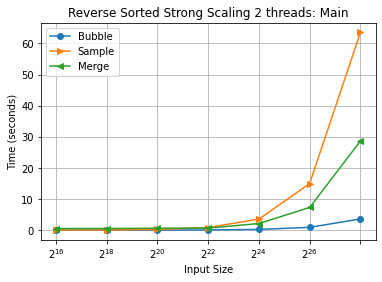

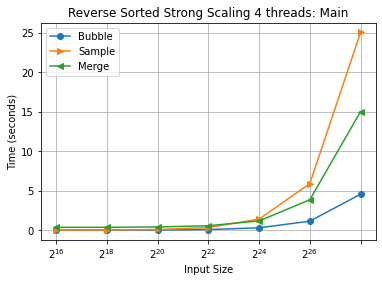

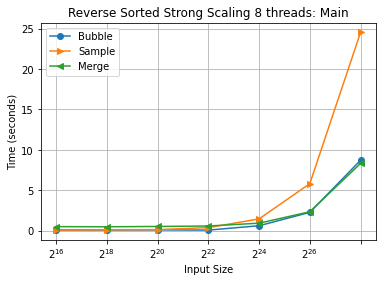

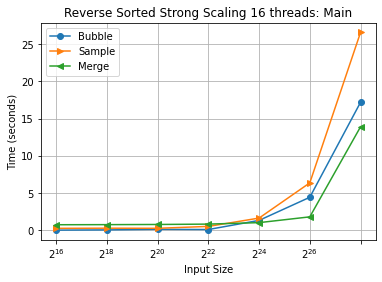

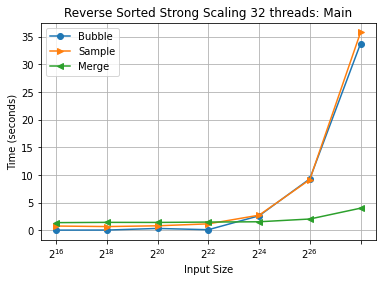

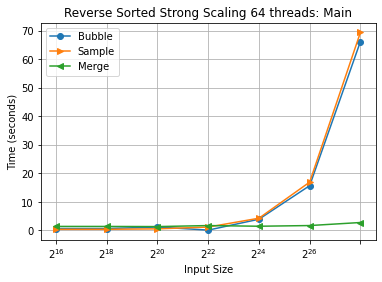

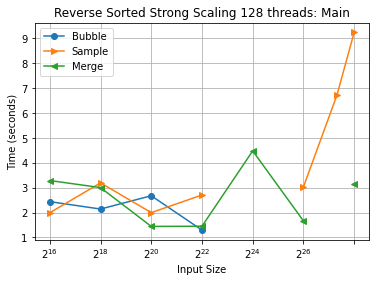

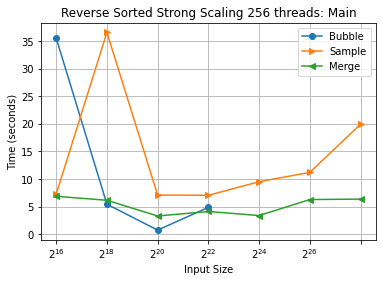

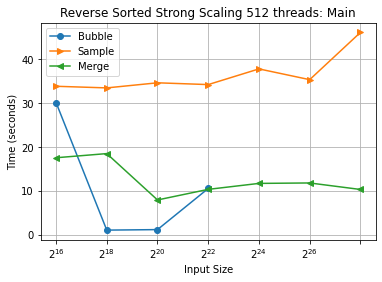

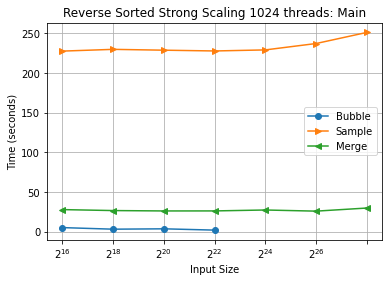

In [18]:
i = 0
for ctk in allctk:
    plot_mpl2(
        df=ctk.dataframe[[temp[0]]].loc["main"],
        df1= ctk.dataframe[[temp[1]]].loc["main"],
        df2= ctk.dataframe[[temp[2]]].loc["main"],
        title=f"Reverse Sorted Strong Scaling {threads[i]} threads: Main",
        xlabel="Input Size",
        ylabel="Time (seconds)",
        label1='Bubble',
        label2='Sample',
        label3='Merge'
    )
    i += 1

## comp_large Graphs

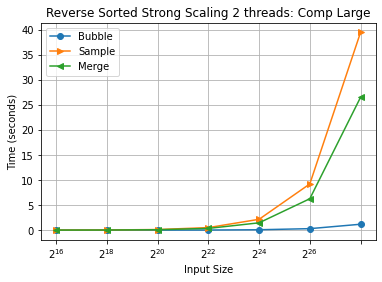

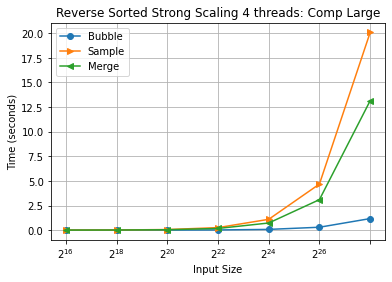

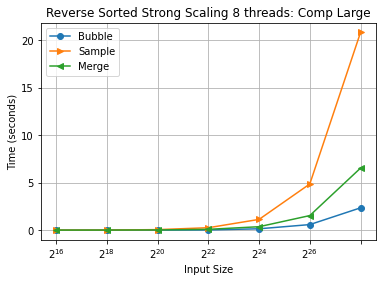

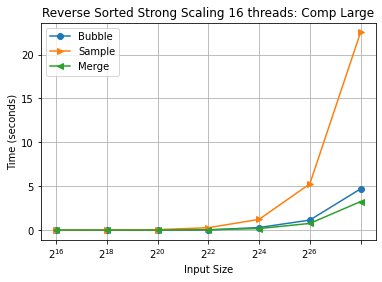

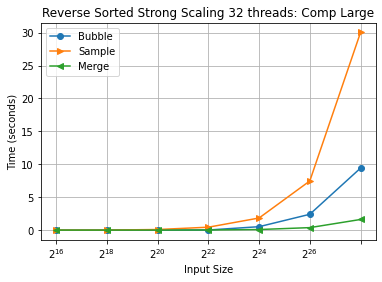

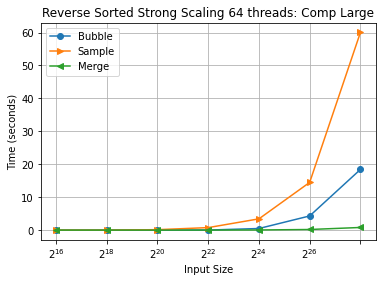

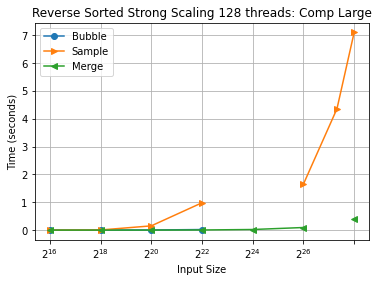

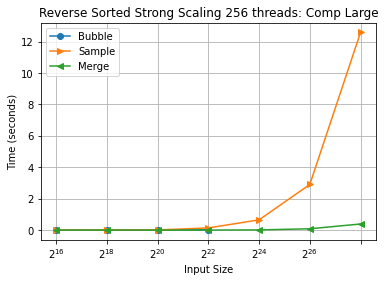

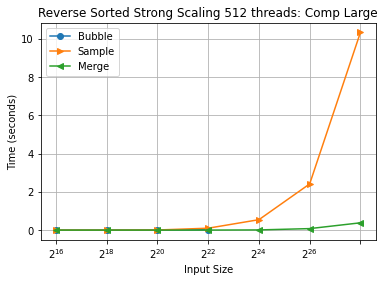

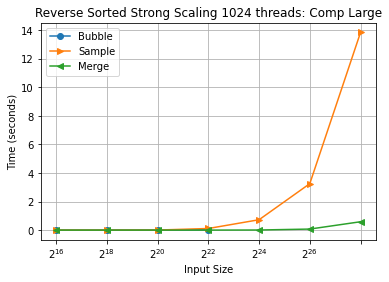

In [19]:
i = 0
for ctk in allctk:
    plot_mpl2(
        df=ctk.dataframe[[temp[0]]].loc["comp_large"],
        df1= ctk.dataframe[[temp[1]]].loc["comp_large"],
        df2= ctk.dataframe[[temp[2]]].loc["comp_large"],
        title=f"Reverse Sorted Strong Scaling {threads[i]} threads: Comp Large",
        xlabel="Input Size",
        ylabel="Time (seconds)",
        label1='Bubble',
        label2='Sample',
        label3='Merge'
    )
    i += 1

## Comm Graphs

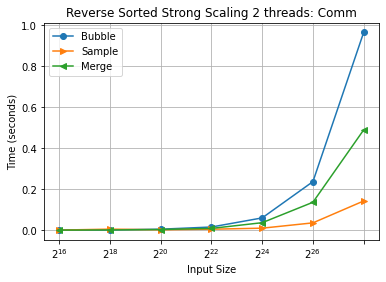

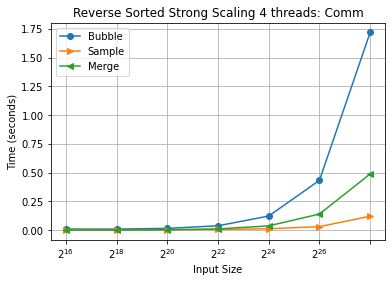

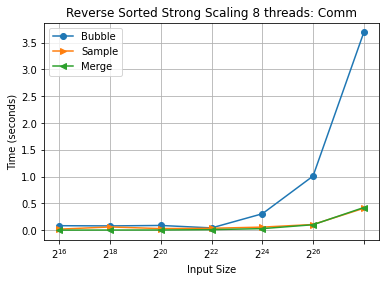

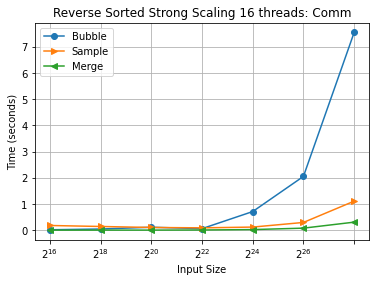

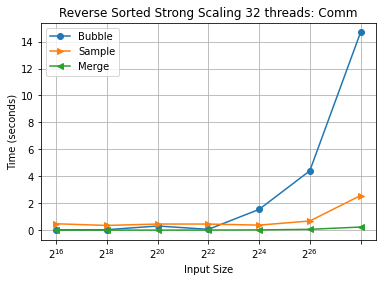

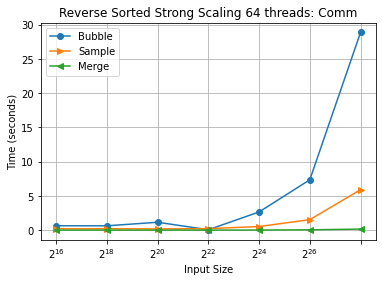

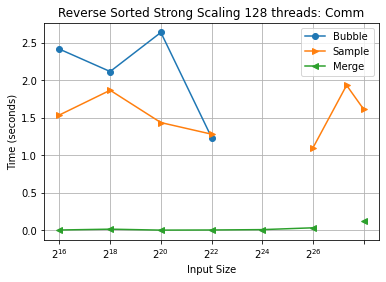

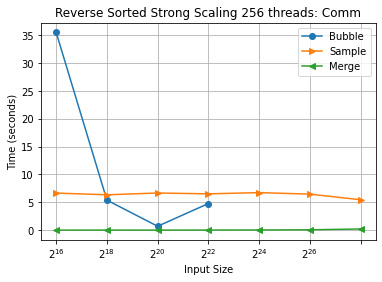

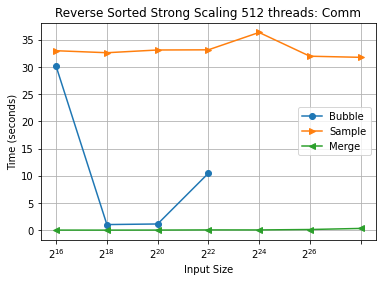

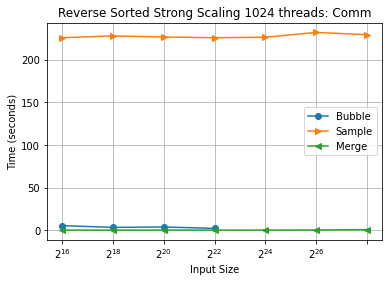

In [21]:
i = 0
for ctk in allctk:
    plot_mpl2(
        df=ctk.dataframe[[temp[0]]].loc["comm"],
        df1= ctk.dataframe[[temp[1]]].loc["comm"],
        df2= ctk.dataframe[[temp[2]]].loc["comm"],
        title=f"Reverse Sorted Strong Scaling {threads[i]} threads: Comm",
        xlabel="Input Size",
        ylabel="Time (seconds)",
        label1='Bubble',
        label2='Sample',
        label3='Merge'
    )
    i += 1

## TODO: Speedup